In [1]:
import os 
import pandas as pd
from collections import defaultdict
import numpy as np 
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Counting Plot

In [105]:
samples = [
    'TCGA-BH-A18V-01A-11R-A12D-07.all', 
        'TCGA-C8-A12P-01A-11R-A115-07.all', 
        'TCGA-AO-A0JM-01A-21R-A056-07.all', 
        'TCGA-A2-A0SX-01A-12R-A084-07.all',
        'TCGA-A2-A0D2-01A-21R-A034-07.all']

counting = []
legend = []
sample_string = []
for sample in samples:
    display(sample)
    sample_short = ''.join(sample.split('.')[:-1])
    sample_pool = sample.replace('-', '').replace('.', '')
    sample_base = '-'.join(sample_short.split('-')[0:3])

    path = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}_summary_plotting.tsv.gz'



    df = pd.read_csv(path, compression="gzip")
    df['junctionAnnotated'] = df['junctionAnnotated'].astype(str)
    df['readFrameAnnotated'] = df['readFrameAnnotated'].astype(str)
    df['junctionAnnotated_readFrameAnnotated'] = df['junctionAnnotated'] + '_' +  df['readFrameAnnotated']
    display(df.head())
    display(df.shape)
    
    display('ja = 1, rfa = 1')
    display(df.loc[(df['readFrameAnnotated'] == '1') & (df['junctionAnnotated'] == '1')].shape[0])
    display('ja = 0, rfa = 0')
    display(df.loc[(df['readFrameAnnotated'] == '0') & (df['junctionAnnotated'] == '0')].shape[0])
    display('ja = 0, rfa = 1')
    display(df.loc[(df['readFrameAnnotated'] == '1') & (df['junctionAnnotated'] == '0')].shape[0])
    display('ja = 1, rfa = 0')
    display(df.loc[(df['readFrameAnnotated'] == '0') & (df['junctionAnnotated'] == '1')].shape[0])

    df = df.loc[(df['junctionAnnotated'] == '0')]
    display('junction not annotated')
    display(df.shape)
    


    counting.append(df['peptide'].unique().shape[0])
    legend.append('cancer-specific #unique bi-exons peptides')
    counting.append(df['kmer'].unique().shape[0])
    legend.append('cancer-specific #unique junction-9mers')
#     counting.append(df['gene'].unique().shape[0])
#     legend.append('cancer-specific #uniques genes of origin')
    dz = df.loc[df['validated_peptide'] == 1]
    counting.append(dz['peptide'].unique().shape[0])
    legend.append('MS validated #unique bi-exons peptides')
    dz = df.loc[df['validated_kmer'] == 1]
    counting.append(dz['kmer'].unique().shape[0])
    legend.append('MS validated #unique junction-9mers')
#     counting.append(dz['gene'].unique().shape[0])
#     legend.append('MS validated #uniques genes of origin')
    sample_string.extend([sample_base] * 4)

'TCGA-BH-A18V-01A-11R-A12D-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,peptide,validated_peptide,validated_kmer,max_detections,TCGABHA18V01A11RA12D07all,percentile_rank,affinity,readFrameAnnotated,junctionAnnotated,#cancer_samples,junctionAnnotated_readFrameAnnotated
0,2,56,1,0,0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,0,0,NaN,10.0,8.5,17394.11,0,0,969.0,0_0
1,2,0,1,0,0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,0,0,NaN,10.0,8.5,17394.11,0,0,969.0,0_0
2,4,12,0,0,0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,WLRGELDRAAADGVLSVYPGLPASPSAGSACDQHLLELHWLCGGLCLRP,0,0,NaN,401.0,0.5,115.36,0,1,1099.0,1_0
3,5,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,9.0,1.8,5876.76,0,1,971.0,1_0
4,6,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,9.0,1.8,5876.76,0,1,971.0,1_0


(235918, 19)

'ja = 1, rfa = 1'

21027

'ja = 0, rfa = 0'

34480

'ja = 0, rfa = 1'

5196

'ja = 1, rfa = 0'

174681

'junction not annotated'

(39748, 19)

'TCGA-C8-A12P-01A-11R-A115-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,peptide,validated_peptide,validated_kmer,max_detections,TCGAC8A12P01A11RA11507all,percentile_rank,affinity,readFrameAnnotated,junctionAnnotated,#cancer_samples,junctionAnnotated_readFrameAnnotated
0,2,56,1,0,0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,0,0,NaN,9.0,6.5,7657.20,0,0,969.0,0_0
1,2,0,1,0,0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,0,0,NaN,9.0,6.5,7657.20,0,0,969.0,0_0
2,4,12,0,0,0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,WLRGELDRAAADGVLSVYPGLPASPSAGSACDQHLLELHWLCGGLCLRP,0,0,NaN,301.0,2.5,1791.30,0,1,1099.0,1_0
3,5,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,9.0,15.0,14828.98,0,1,971.0,1_0
4,6,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,9.0,15.0,14828.98,0,1,971.0,1_0


(231642, 19)

'ja = 1, rfa = 1'

21063

'ja = 0, rfa = 0'

30528

'ja = 0, rfa = 1'

4086

'ja = 1, rfa = 0'

175431

'junction not annotated'

(34686, 19)

'TCGA-AO-A0JM-01A-21R-A056-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,peptide,validated_peptide,validated_kmer,max_detections,TCGAAOA0JM01A21RA05607all,percentile_rank,affinity,readFrameAnnotated,junctionAnnotated,#cancer_samples,junctionAnnotated_readFrameAnnotated
0,1,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,8.0,1.8,5876.76,0,1,971.0,1_0
1,2,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,8.0,1.8,5876.76,0,1,971.0,1_0
2,3,58,0,0,0,ENSG00000011304.20,805187_805512,AAAFASPQA,SLDGQNIYNACCTLRIDFSKLTSLNVKYNNDKSRDYTRPDLPSGDS...,0,0,NaN,3.0,10.0,16407.83,0,1,1046.0,1_0
3,3,1,0,0,0,ENSG00000011304.20,805516_805555,AAAFASPQA,SLDGQNIYNACCTLRIDFSKLTSLNVKYNNDKSRDYTRPDLPSGDS...,0,0,NaN,3.0,10.0,16407.83,0,1,1046.0,1_0
4,5,58,0,0,1,ENSG00000011304.20,805187_805512,AAAFASPQA,SLDGQNIYNACCTLRIDFSKLTSLNVKYNNDKSRDYTRPDLPSGDS...,0,0,NaN,3.0,10.0,16407.83,0,1,1046.0,1_0


(234302, 19)

'ja = 1, rfa = 1'

21084

'ja = 0, rfa = 0'

30240

'ja = 0, rfa = 1'

4335

'ja = 1, rfa = 0'

178109

'junction not annotated'

(34647, 19)

'TCGA-A2-A0SX-01A-12R-A084-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,peptide,validated_peptide,validated_kmer,max_detections,TCGAA2A0SX01A12RA08407all,percentile_rank,affinity,readFrameAnnotated,junctionAnnotated,#cancer_samples,junctionAnnotated_readFrameAnnotated
0,2,56,1,0,0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,0,0,NaN,6.0,8.5,17394.11,0,0,969.0,0_0
1,2,0,1,0,0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,0,0,NaN,6.0,8.5,17394.11,0,0,969.0,0_0
2,4,12,0,0,0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,WLRGELDRAAADGVLSVYPGLPASPSAGSACDQHLLELHWLCGGLCLRP,0,0,NaN,310.0,0.5,875.06,0,1,1099.0,1_0
3,5,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,12.0,1.8,5876.76,0,1,971.0,1_0
4,6,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,12.0,1.8,5876.76,0,1,971.0,1_0


(236007, 19)

'ja = 1, rfa = 1'

21264

'ja = 0, rfa = 0'

33207

'ja = 0, rfa = 1'

4473

'ja = 1, rfa = 0'

176529

'junction not annotated'

(37746, 19)

'TCGA-A2-A0D2-01A-21R-A034-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,peptide,validated_peptide,validated_kmer,max_detections,TCGAA2A0D201A21RA03407all,percentile_rank,affinity,readFrameAnnotated,junctionAnnotated,#cancer_samples,junctionAnnotated_readFrameAnnotated
0,2,56,1,0,0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,0,0,NaN,3.0,28.0,28062.41,0,0,969.0,0_0
1,2,0,1,0,0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,0,0,NaN,3.0,28.0,28062.41,0,0,969.0,0_0
2,4,12,0,0,0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,WLRGELDRAAADGVLSVYPGLPASPSAGSACDQHLLELHWLCGGLCLRP,0,0,NaN,1139.0,2.5,1791.30,0,1,1099.0,1_0
3,5,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,24.0,16.0,20550.52,0,1,971.0,1_0
4,6,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,24.0,16.0,20550.52,0,1,971.0,1_0


(230137, 19)

'ja = 1, rfa = 1'

20178

'ja = 0, rfa = 0'

32041

'ja = 0, rfa = 1'

3996

'ja = 1, rfa = 0'

173382

'junction not annotated'

(36109, 19)

In [106]:
plot_counts = pd.DataFrame( {'Number of instances': counting, 
                        'legend': legend, 'sample': sample_string})

In [107]:
plot_counts

,Number of instances,legend,sample
0,2248,cancer-specific #unique bi-exons peptides,TCGA-BH-A18V
1,5432,cancer-specific #unique junction-9mers,TCGA-BH-A18V
2,861,MS validated #unique bi-exons peptides,TCGA-BH-A18V
3,0,MS validated #unique junction-9mers,TCGA-BH-A18V
4,2085,cancer-specific #unique bi-exons peptides,TCGA-C8-A12P
5,4483,cancer-specific #unique junction-9mers,TCGA-C8-A12P
6,635,MS validated #unique bi-exons peptides,TCGA-C8-A12P
7,0,MS validated #unique junction-9mers,TCGA-C8-A12P
8,1966,cancer-specific #unique bi-exons peptides,TCGA-AO-A0JM
9,4150,cancer-specific #unique junction-9mers,TCGA-AO-A0JM


In [108]:
color1 = '#000080'
color2 = "#808000"
palette_custom = [color1 if 'MS' in field else color2 for field in plot_counts['legend']]


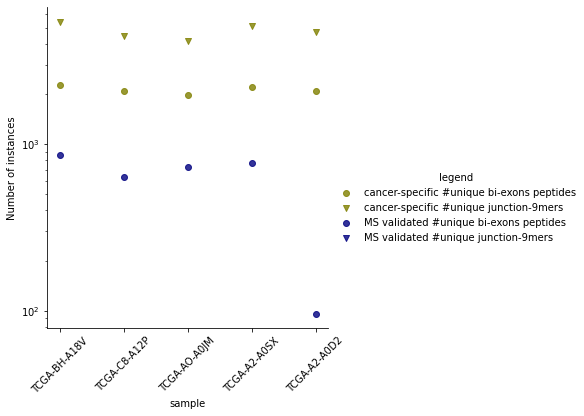

In [109]:
sns.lmplot( x="sample", y='Number of instances', 
           data=plot_counts, fit_reg=False, hue='legend',
           legend=True, markers=["o", "v"] *2,
                                 #, "s"] * 2, 
          palette=palette_custom)

plt.xticks(rotation=45)
plt.yscale("log")  

# Binding Plot

In [158]:
df

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,peptide,validated_peptide,validated_kmer,max_detections,TCGAA2A0D201A21RA03407all,percentile_rank,affinity,readFrameAnnotated,junctionAnnotated,#cancer_samples
0,2,56,1,0,0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,0,0,NaN,3.0,28.0,28062.41,0,0,969.0
1,2,0,1,0,0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,0,0,NaN,3.0,28.0,28062.41,0,0,969.0
2,4,12,0,0,0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,WLRGELDRAAADGVLSVYPGLPASPSAGSACDQHLLELHWLCGGLCLRP,0,0,NaN,1139.0,2.5,1791.30,0,1,1099.0
3,5,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,24.0,16.0,20550.52,0,1,971.0
4,6,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,0,0,NaN,24.0,16.0,20550.52,0,1,971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230132,249273,4,0,0,0,ENSG00000134419.15,18783091_18782987,YYSFIVQIK,NLYPPNYASGALVESILTSWLLYYSFIVQIKCLMDSG,0,0,NaN,38.0,1.2,2295.55,0,1,1101.0
230133,249275,24,0,0,0,ENSG00000134419.15,18783640_18783102,YYSFIVQIK,NLYPPNYASGALVESILTSWLLYYSFIVQIKCLMD,0,0,NaN,38.0,1.2,2295.55,0,1,1101.0
230134,249275,4,0,0,0,ENSG00000134419.15,18783091_18782987,YYSFIVQIK,NLYPPNYASGALVESILTSWLLYYSFIVQIKCLMD,0,0,NaN,38.0,1.2,2295.55,0,1,1101.0
230135,249277,24,0,0,0,ENSG00000134419.15,18783640_18783102,YYSFIVQIK,NLYPPNYASGALVESILTSWLLYYSFIVQIKCLM,0,0,NaN,38.0,1.2,2295.55,0,1,1101.0


'TCGA-BH-A18V-01A-11R-A12D-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


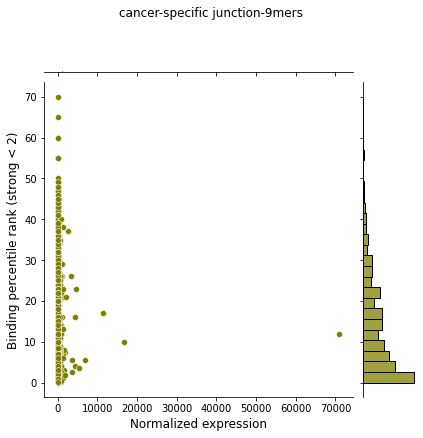

'TCGA-C8-A12P-01A-11R-A115-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


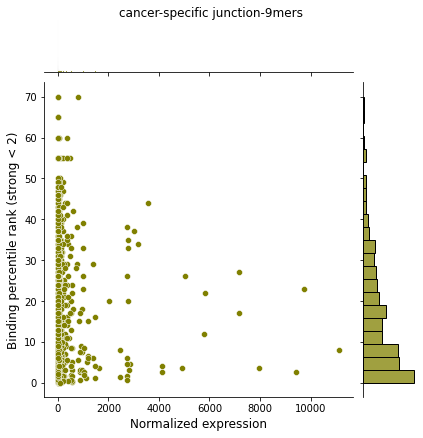

'TCGA-AO-A0JM-01A-21R-A056-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


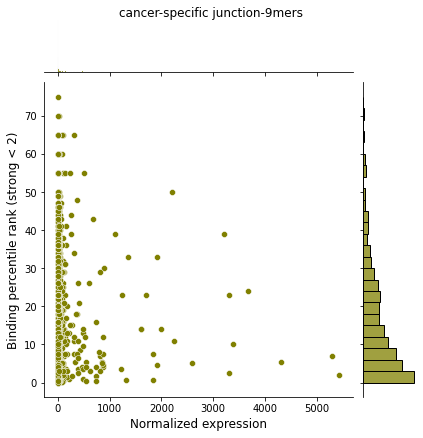

'TCGA-A2-A0SX-01A-12R-A084-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


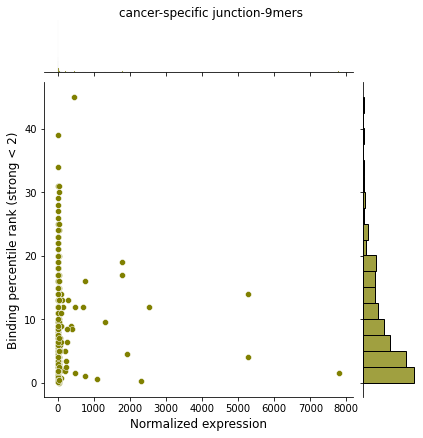

'TCGA-A2-A0D2-01A-21R-A034-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


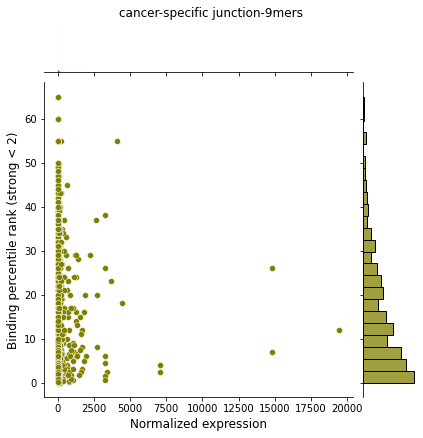

In [155]:
samples = [
    'TCGA-BH-A18V-01A-11R-A12D-07.all', 
        'TCGA-C8-A12P-01A-11R-A115-07.all', 
        'TCGA-AO-A0JM-01A-21R-A056-07.all', 
        'TCGA-A2-A0SX-01A-12R-A084-07.all',
        'TCGA-A2-A0D2-01A-21R-A034-07.all']
for sample in samples:
    display(sample)
    sample_short = ''.join(sample.split('.')[:-1])
    sample_pool = sample.replace('-', '').replace('.', '')
    sample_base = '-'.join(sample_short.split('-')[0:3])

    path = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}_summary_plotting.tsv.gz'

    df = pd.read_csv(path, compression="gzip")
    plot_df = df.loc[ df['junctionAnnotated'] == 0, \
             ['kmer', sample_pool, 'percentile_rank', '#cancer_samples']].drop_duplicates()
    ax = sns.jointplot(data=plot_df, x=sample_pool, y="percentile_rank", 
                       color = color2)
    x_label = 'Normalized expression'
    y_label = 'Binding percentile rank (strong < 2)'
    ax.set_axis_labels(x_label, y_label, fontsize=12)  
    plt.suptitle('cancer-specific junction-9mers', y = 1,  fontsize=12)  
    plt.show()



# Recurrence 

'TCGA-BH-A18V-01A-11R-A12D-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


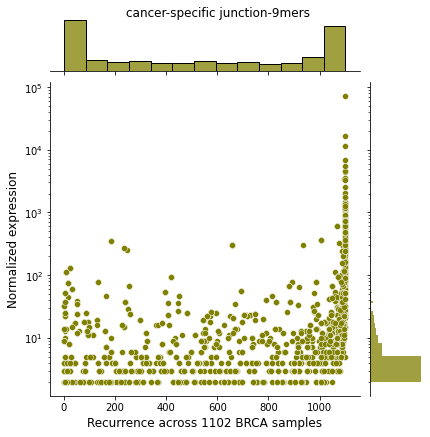

'TCGA-C8-A12P-01A-11R-A115-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


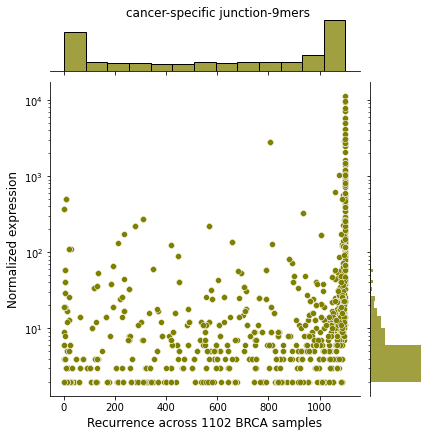

'TCGA-AO-A0JM-01A-21R-A056-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


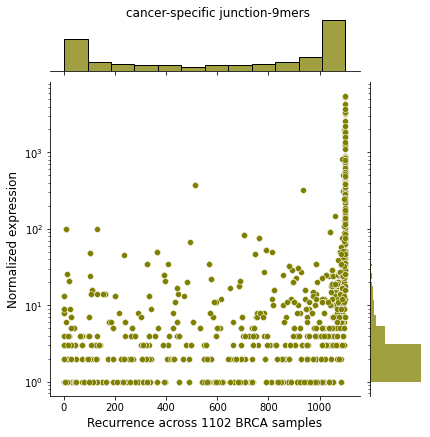

'TCGA-A2-A0SX-01A-12R-A084-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


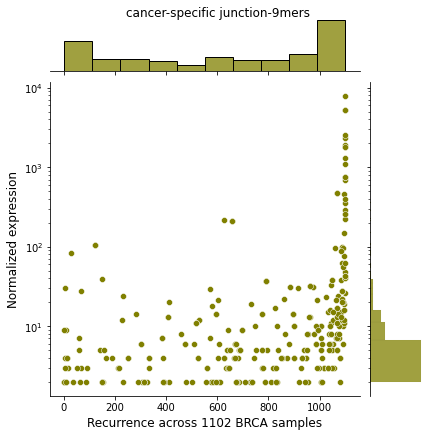

'TCGA-A2-A0D2-01A-21R-A034-07.all'

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


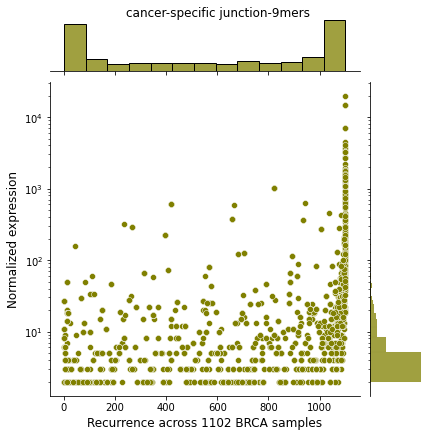

In [157]:
samples = [
    'TCGA-BH-A18V-01A-11R-A12D-07.all', 
        'TCGA-C8-A12P-01A-11R-A115-07.all', 
        'TCGA-AO-A0JM-01A-21R-A056-07.all', 
        'TCGA-A2-A0SX-01A-12R-A084-07.all',
        'TCGA-A2-A0D2-01A-21R-A034-07.all']
for sample in samples:
    display(sample)
    sample_short = ''.join(sample.split('.')[:-1])
    sample_pool = sample.replace('-', '').replace('.', '')
    sample_base = '-'.join(sample_short.split('-')[0:3])

    path = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}_summary_plotting.tsv.gz'

    df = pd.read_csv(path, compression="gzip")
    plot_df = df.loc[ df['junctionAnnotated'] == 0, \
             ['kmer', sample_pool, 'percentile_rank', '#cancer_samples']].drop_duplicates()
    ax = sns.jointplot(data=plot_df, y=sample_pool, x="#cancer_samples", 
                       color = color2)
    y_label = 'Normalized expression'
    x_label = 'Recurrence across 1102 BRCA samples'
    plt.yscale("log")  
    ax.set_axis_labels(x_label, y_label, fontsize=12)  
    plt.suptitle('cancer-specific junction-9mers', y = 1,  fontsize=12)  
    plt.show()

